# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [2]:
df=pd.read_csv("car.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#checking the number of rows and columns
df.shape

(301, 9)

In [4]:
#statistical measure
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Dividing the data and label

In [7]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

# encoding

In [10]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [11]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


# Splitting the data into label

In [12]:
x=df.drop(["Car_Name","Selling_Price"],axis=1)
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [13]:
y=df["Selling_Price"]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting train and  test data

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


# MODEL TRAINING

# 1) LINEAR REGRESSION

In [16]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

MODEL EVALUATION

In [17]:
#evaluatingtraining data
x_training_data=lr.predict(x_train)

In [18]:
#R Squared error
error_score=metrics.r2_score(y_train,x_training_data)
print("R Squared error:",error_score)

R Squared error: 0.8838169193709796


In [20]:
##predicting training data
x_testing_data=lr.predict(x_test)

In [21]:
#R Squared error
error_score=metrics.r2_score(y_test,x_testing_data)
print("R Squared error:",error_score)

R Squared error: 0.8401532365377784


# Visualize  the actual prices and Predicted prices

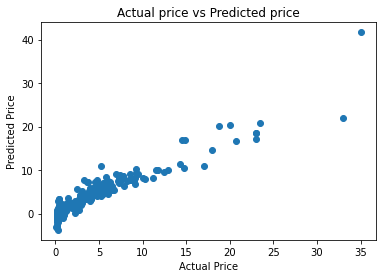

In [19]:
plt.scatter(y_train,x_training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

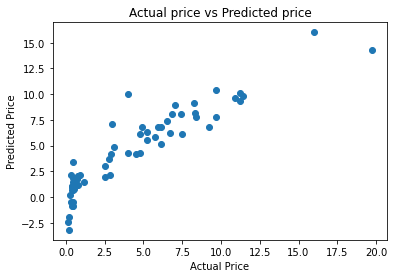

In [22]:
plt.scatter(y_test,x_testing_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

# LASSO REGRESSION

In [24]:
ls=Lasso()
ls.fit(x_train,y_train)

Lasso()

MODEL EVALUATION

In [29]:
#evaluatingtraining data
x_training_data1=ls.predict(x_train)

In [30]:
#R Squared error
error_score=metrics.r2_score(y_train,x_training_data1)
print("R Squared error:",error_score)

R Squared error: 0.8435873952582827


In [31]:
##predicting training data
x_testing_data=ls.predict(x_test)

In [32]:
#R Squared error
error_score=metrics.r2_score(y_test,x_testing_data)
print("R Squared error:",error_score)

R Squared error: 0.8497457570738539


# Visualize  the actual prices and Predicted prices

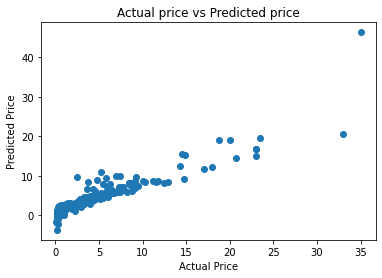

In [33]:
plt.scatter(y_train,x_training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

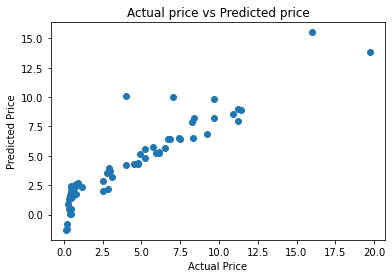

In [34]:
plt.scatter(y_test,x_testing_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()